In [41]:
# Importing required libraries
import cv2 
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import numpy as np

(285, 292)


[]

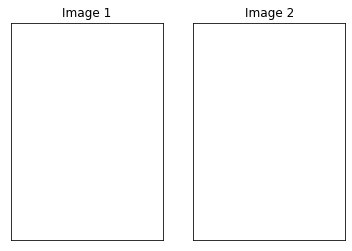

In [42]:
## reading images 
img = cv2.imread('inputimage/einstein1.jpg',0) 
img1=cv2.imread('inputimage/xbox_logo.jpg',1)
## Displaying read images using plt.imshow
plt.subplot(1,2,1)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGBA2BGRA))
print(img.shape)
plt.title("Image 1")

plt.subplot(1,2,2)
# plt.imshow(img1,cmap='gray')
plt.title("Image 2")

plt.setp(plt.gcf().get_axes(),xticks=[],yticks=[])

(337, 600, 3)


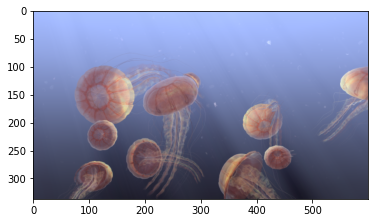

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("inputimage/chess1.png")
image = mpimg.imread("inputimage/jellyfish1.png")
print(image.shape)
plt.imshow(image)
plt.show()

In [44]:

## Function that takes in image on which kernel operation should be performed 
#and kernel values corresponding to the type of operation that is to be performed. 

def edge_detect(img,kernel):

  # saving output of convolution
  # res=convolve2d(img,kernel)
  # res = np.array([1, 2, 3, 4, 5])
  res=convolve2d(img[:,:,0],kernel)
  res = np.expand_dims(res, axis=2)

  c = convolve2d(img[:,:,1],kernel)
  c = np.expand_dims(c, axis=2)
  res = np.concatenate((res,c),axis=2)
  
  c = convolve2d(img[:,:,2],kernel)
  c = np.expand_dims(c, axis=2)
  res = np.concatenate((res,c),axis=2)

  # reformed_image = np.dstack(((abs(convolved_image_r)), 
  #                               (abs(convolved_image_g)), 
  #                               (abs(convolved_image_b))))

  # reformed_image = np.dstack((((convolved_image_r)), 
  #                               ((convolved_image_g)), 
  #                               ((convolved_image_b))))


  print("shape")
  # print(reformed_image.shape)
  img = np.insert(img, 0, [0], axis=0)
  img = np.insert(img, 0, [0], axis=0)
  img = np.insert(img, 0, [0], axis=1)
  img = np.insert(img, 0, [0], axis=1)
  # print("shape")
  # print(b.shape)
  # res = np.concatenate((res, np.empty_like(res)),axis=1)

  
  # res[2]=convolve2d(img[:,:,2],kernel)

  fig, ax = plt.subplots(2, 2, figsize=(64,64))
  fig.tight_layout()
  # show original and transformed images
  plt.subplot(1,2,1)
  plt.imshow(img,cmap="gray")
  plt.title("original")

  plt.subplot(1,2,2)
  plt.imshow(res)
  plt.title("transformed")
  
  # removing x and y axis ticks
  plt.setp(plt.gcf().get_axes(),xticks=[],yticks=[])

In [45]:
def convolver_rgb(image, kernel, iterations = 1):
    convolved_image_r = convolve2d(image[:,:,0], kernel)
    convolved_image_g = convolve2d(image[:,:,1], kernel)
    convolved_image_b  = convolve2d(image[:,:,2], kernel)
    
    reformed_image = np.dstack((np.rint(abs(convolved_image_r)), 
                                np.rint(abs(convolved_image_g)), 
                                np.rint(abs(convolved_image_b))))*255
   
                               
                     
    fig, ax = plt.subplots(1,3, figsize = (17,10))
    
    ax[0].imshow(abs(convolved_image_r), cmap='Reds')
    ax[0].set_title(f'Red', fontsize = 15)
    
    ax[1].imshow(abs(convolved_image_g), cmap='Greens')
    ax[1].set_title(f'Green', fontsize = 15)
    
    ax[2].imshow(abs(convolved_image_b), cmap='Blues')
    ax[2].set_title(f'Blue', fontsize = 15)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    return np.array(reformed_image).astype(np.uint8)



In [46]:

## Function that takes in image on which kernel operation should be performed 
#and kernel values corresponding to the type of operation that is to be performed. 

def edge_detect1(img,kernel):

  # saving output of convolution
  res=convolve2d(img,kernel, mode="valid")
  # res = np.array([1, 2, 3, 4, 5])
  
  fig, ax = plt.subplots(2, 2, figsize=(64,64))
  fig.tight_layout()
  # show original and transformed images
  plt.subplot(1,2,1)
  plt.imshow(img,cmap="gray")
  plt.title("original")

  plt.subplot(1,2,2)
  plt.imshow(res,cmap="gray")
  print(res)
  plt.title("transformed")
  
  # removing x and y axis ticks
  plt.setp(plt.gcf().get_axes(),xticks=[],yticks=[])

[[-2  0  4]
 [-4  2 -2]
 [-1  4  3]]


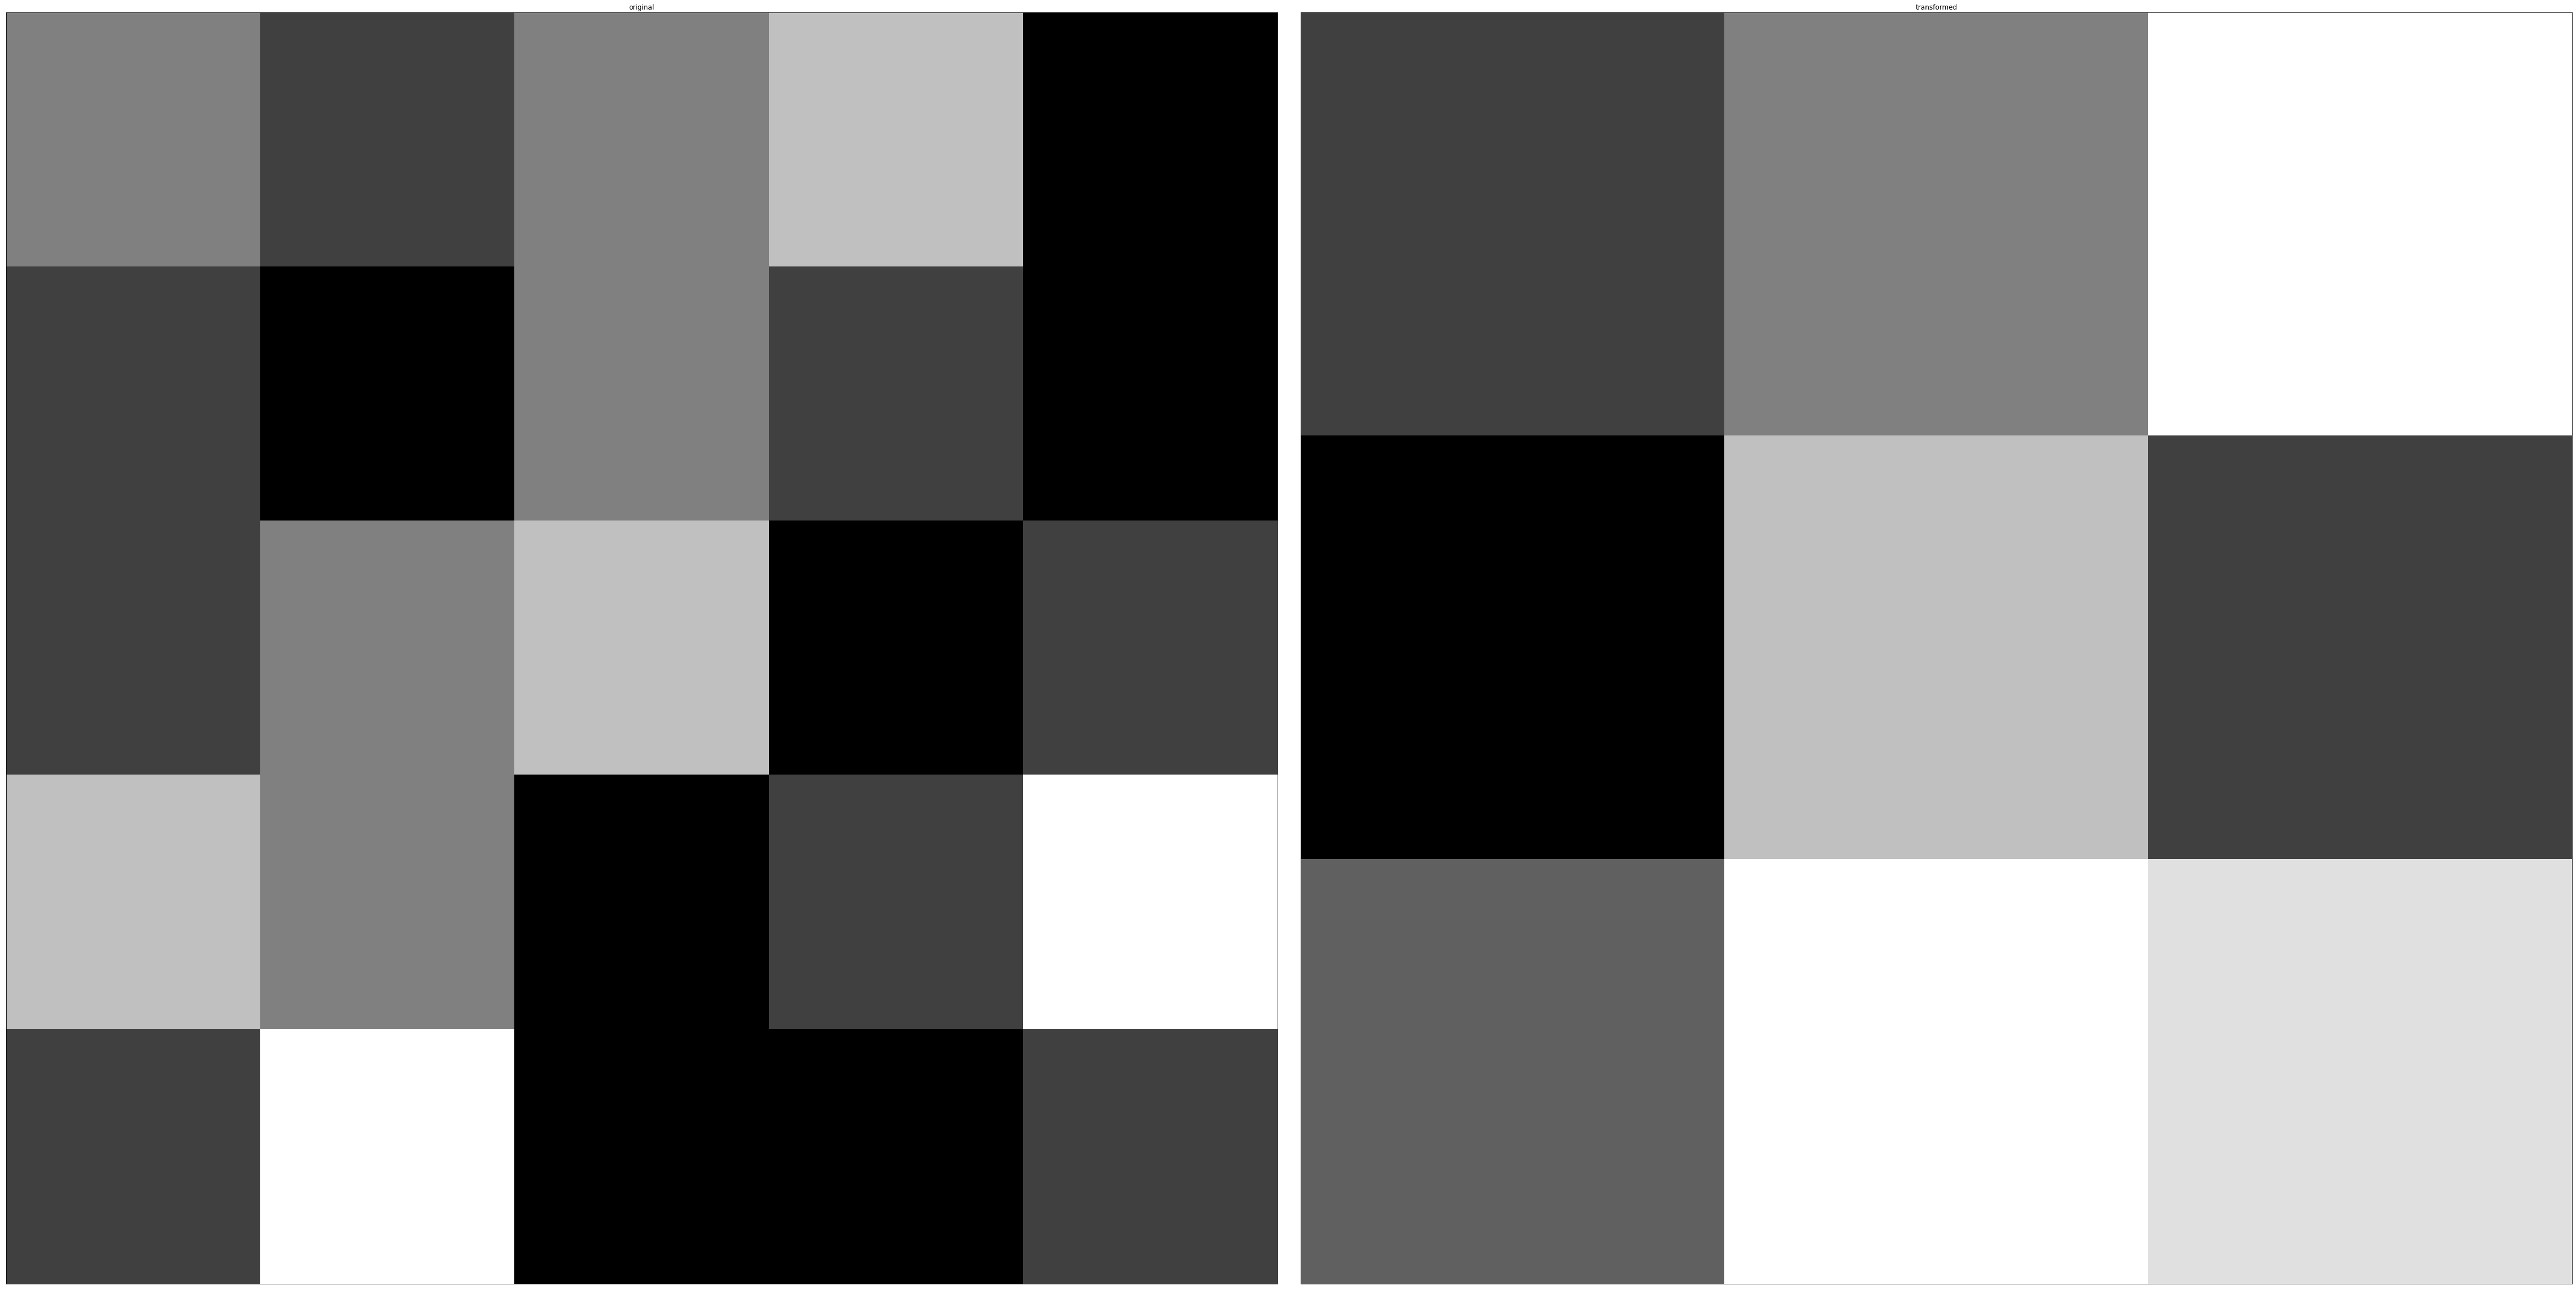

In [47]:
## Using Horizontal Kernel
h_kernel=np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
# h_kernel=np.array([[-1,0,1],
#                    [-2,0,2],
#                    [-1,0,1]])
# h_kernel=np.array([[1,0,-1],
#                    [2,0,-2],
#                    [1,0,-1]])
# h_kernel=np.array([[-1,-1,-1],
#                    [-1,8,-1],
#                    [-1,-1,-1]])
# h_kernel=(1/34)*np.array(4*[[1.,2.,1.],
#                    [2.,4.,2.],
#                    [1.,2.,1.]])
# print(h_kernel)
# h_kernel=np.array([[1,2,1],
#                    [0,0,0],
#                    [-1,-2,-1]])
h_kernel=np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])
# edge_detect(image,h_kernel)

mat = np.array([[2,1,2,3,0],[1,0,2,1,0],[1,2,3,0,1],[3,2,0,1,4],[1,4,0,0,1]])
edge_detect1(mat,h_kernel)

# convolved_rgb_sharpen = convolver_rgb(image, h_kernel, 1)
# plt.figure(num=None, figsize=(8, 6), dpi=80)
# plt.imshow(convolved_rgb_sharpen)

In [48]:
import os

# third-party library
import torch
import torch.nn as nn
import torch.nn as nn
import torch.utils.data as Data
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

c1 = nn.Conv2d(1, 2, kernel_size=2, stride=2, padding=1, padding_mode='zeros')
c2 = nn.Conv2d(2, 2, kernel_size=2, stride=1, padding=0)
conv_block = nn.Sequential(
            c1,
            # nn.ReLU(inplace=True),
               c2,
                     # nn.ReLU(inplace=True),                  
            )

In [49]:
print(c1.weight.data.shape)
print(c1.bias.data.shape)
print(c2.weight.data.shape)
print(c2.weight.data)
# print(c1.weight.data)
b1 = torch.FloatTensor([1, 1])
b2 = torch.FloatTensor([0, 0])
t1 = torch.FloatTensor([[[[-1,  2],
          [ 1, 0]]],


        [[[ 1,  2],
          [ 0,  3]]]])
t2 = torch.FloatTensor([[[[-2, 1],
          [2,  3]],

         [[ 1,  0],
          [ 2,  3]]],


        [[[ 1,  -1],
          [ 1,  2]],

         [[3, 2],
          [-1,  2
          ]]]])

# t2 = torch.FloatTensor([[[[2., -1.],
#           [2., 3.]],

#          [[0., -1.],
#           [2., 2.]]]])

# t2 = torch.ones((1, 2, 2, 2), dtype=torch.float32)
# print(t2)
c1.weight.data = t1
c1.bias.data = b1
c2.weight.data = t2
c2.bias.data = b2

# print(c1.weight)
# print(c2.weight)



torch.Size([2, 1, 2, 2])
torch.Size([2])
torch.Size([2, 2, 2, 2])
tensor([[[[-0.2140,  0.0928],
          [-0.2770, -0.0329]],

         [[ 0.2805, -0.2709],
          [-0.2386,  0.0924]]],


        [[[-0.1428,  0.3093],
          [-0.0088,  0.3374]],

         [[-0.2852,  0.0105],
          [-0.2642, -0.0201]]]])


In [50]:
ioutput = None

def model_hook(conv_block, input_, output):
    global ioutput
    ioutput = output

conv_block[0].register_forward_hook(model_hook)

conv_block.eval()
# test = torch.tensor([[1, 1],[1 , 1]])
test = torch.ones((1, 1, 2, 2), dtype=torch.float32)
# print(test.shape)
# print(test)
a = conv_block(test)
print(a)
print(ioutput)

tensor([[[[22.]],

         [[17.]]]], grad_fn=<ThnnConv2DBackward>)
tensor([[[[1., 2.],
          [3., 0.]],

         [[4., 1.],
          [3., 2.]]]], grad_fn=<ThnnConv2DBackward>)


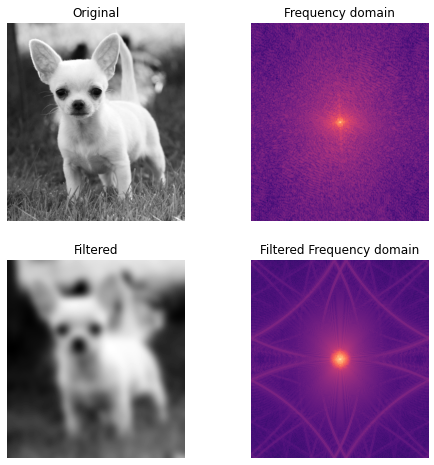

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as sk
from skimage.filters import gaussian, window
from scipy.fftpack import fftn, fftshift

image = sk.imread("./inputimage/dog3.jpg", True)
wimage = image * window('hann', image.shape)  # window image to improve FFT
filtered_image = gaussian(image, 10)
filtered_wimage = filtered_image * window('hann', image.shape)
im_f_mag = fftshift(np.abs(fftn(wimage)))
fim_f_mag = fftshift(np.abs(fftn(filtered_wimage)))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original')
ax[0, 1].imshow(np.log(im_f_mag), cmap='magma')
ax[0, 1].set_title('Frequency domain')
ax[1, 0].imshow(filtered_image, cmap='gray' )
ax[1, 0].set_title('Filtered')
ax[1, 1].imshow(np.log(fim_f_mag), cmap='magma')
ax[1, 1].set_title('Filtered Frequency domain')
[axi.set_axis_off() for axi in ax.ravel()]
plt.show()

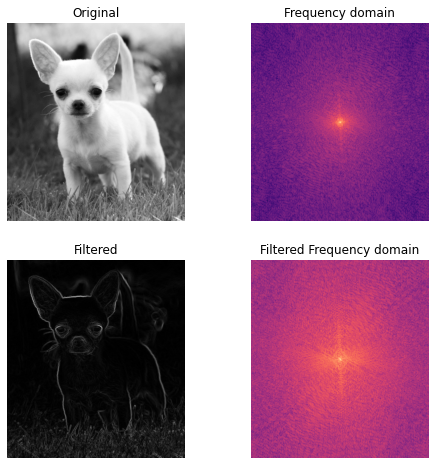

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as sk
from skimage.filters import scharr, window
from scipy.fftpack import fftn, fftshift

image = sk.imread("./inputimage/dog3.jpg", True)
wimage = image * window('hann', image.shape)  # window image to improve FFT
filtered_image = scharr(image)
filtered_wimage = filtered_image * window('hann', image.shape)
im_f_mag = fftshift(np.abs(fftn(wimage)))
fim_f_mag = fftshift(np.abs(fftn(filtered_wimage)))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original')
ax[0, 1].imshow(np.log(im_f_mag), cmap='magma')
ax[0, 1].set_title('Frequency domain')
ax[1, 0].imshow(filtered_image, cmap='gray' )
ax[1, 0].set_title('Filtered')
ax[1, 1].imshow(np.log(fim_f_mag), cmap='magma')
ax[1, 1].set_title('Filtered Frequency domain')
[axi.set_axis_off() for axi in ax.ravel()]
plt.show()